# **\[SOLAR_A\]** gconvgru

JiyunLim  
2023-08-31

## GConvGRU

In [2]:
%run test_model/gconvgru

In [3]:
# read dataframe 
df = pd.read_csv('data_eng_230710.csv')

# make y, y_upper, y_period, time, regions 
y = df.loc[:,'Bukchoncheon':'Gyeongju-si'].to_numpy()
yU = df.loc[:,'Bukchoncheon_Upper':'Gyeongju-si_Upper'].to_numpy()
yP = np.divide(y, yU+1e-10)

t = df.loc[:,'date']
regions = list(df.loc[:, 'Bukchoncheon':'Gyeongju-si'].columns)

In [4]:
# global parameters
TRAIN_RATIO = 0.8
T, N = len(t), len(regions)
LEN_TEST = int(np.floor(T*(1-TRAIN_RATIO)))
LEN_TR = T - LEN_TEST

In [35]:
# create lrnr object
lrnr = RGCN_Learner()
# load data
lrnr.lags = 24
lrnr.train_ratio = 0.8
lrnr.load(y)
# construct network
lrnr.nof_filters = 16
lrnr.model = GConv_GRU(node_features=lrnr.lags, filters=lrnr.nof_filters).to(device)
lrnr.optimizer = torch.optim.Adam(lrnr.model.parameters(), lr=10/1000)
# learn
lrnr.get_batches(128)
for e in range(10):
    lrnr.learn()

epoch=1  loss=0.599539209157228539134979        
epoch=2  loss=0.2277526566758752947551727       
epoch=3  loss=0.1777782305143773645331573       
epoch=4  loss=0.1433956595137715300870514       
epoch=5  loss=0.1273262063041329441271973   
epoch=6  loss=0.115414144471287733903656            
epoch=7  loss=0.1079713525250554128945541       
epoch=8  loss=0.1024705669842660408616257       
epoch=9  loss=0.0976832653395831653059769       
epoch=10     loss=0.094070150516927241946487        

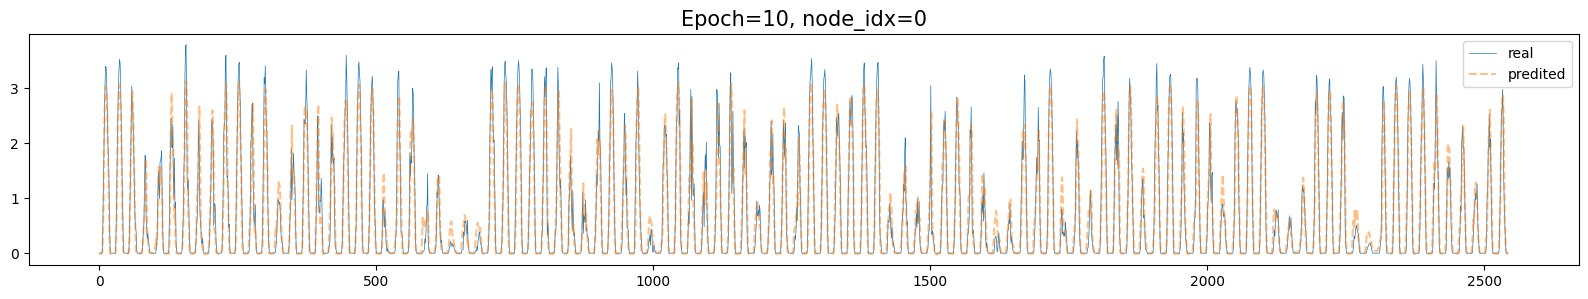

In [36]:
lrnr.figs[-1]

In [37]:
yhat = np.concatenate([np.array([list(lrnr.yhat[0])]*lrnr.lags),lrnr.yhat],axis=0)
yhat[yhat<0] = 0

In [39]:
((y - yhat)[LEN_TR:,:]**2).mean()

In [5]:
lrnr1 = RGCN_Learner()
lrnr1.lags = 1
lrnr1.train_ratio = 0.8
lrnr1.load(yU)

lrnr1.nof_filters = 4
lrnr1.model = GConv_GRU(node_features=lrnr1.lags, filters=lrnr1.nof_filters).to(device)
lrnr1.optimizer = torch.optim.Adam(lrnr1.model.parameters(), lr=10/1000)

lrnr1.get_batches(24)
for e in range(5):
    lrnr1.learn()

epoch=1  loss=2.80590895060883960826874     
epoch=2  loss=0.329726569506144818582153        
epoch=3  loss=0.056401385037704956423828        
epoch=4  loss=0.026137092508115748157463            
epoch=5  loss=0.017238846560398682458601            

In [6]:
yUhat = np.concatenate([np.array([list(lrnr1.yhat[0])]*lrnr1.lags),lrnr1.yhat],axis=0)
yU_mse = np.mean((yU - yUhat)[LEN_TR:,:]**2)
yU_mse

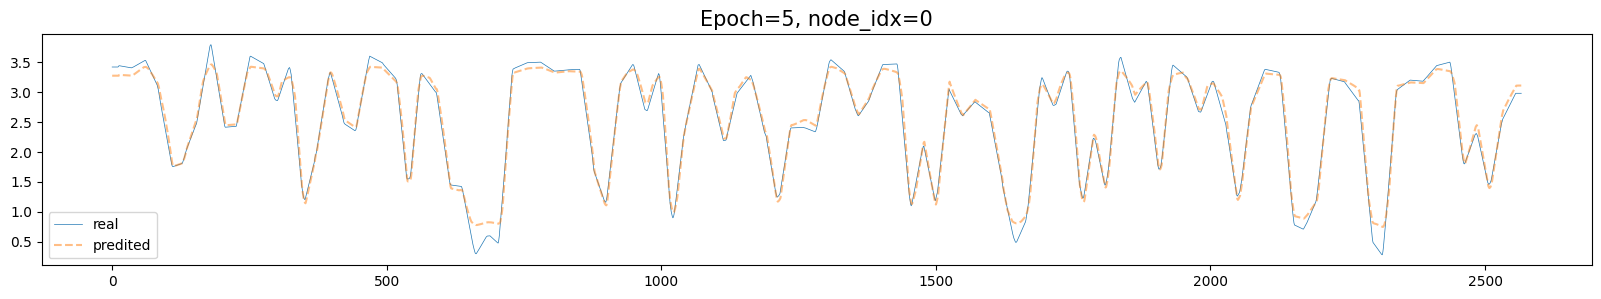

In [7]:
lrnr1.figs[-1]

-   안정적

In [30]:
lrnr2 = RGCN_Learner()
lrnr2.lags = 24
lrnr2.train_ratio = 0.8
lrnr2.load(yP)

lrnr2.nof_filters = 16
lrnr2.model = GConv_GRU(node_features=lrnr2.lags, filters=lrnr2.nof_filters).to(device)
lrnr2.optimizer = torch.optim.Adam(lrnr2.model.parameters(), lr=10/1000)

lrnr2.get_batches(128)
for e in range(10):
    lrnr2.learn()

epoch=1  loss=0.0881545562297105845838547       
epoch=2  loss=0.02201331447577104886693954  
epoch=3  loss=0.0184128275141119960602188       
epoch=4  loss=0.016949982440564781367836    6   
epoch=5  loss=0.0158554206136614132420826       
epoch=6  loss=0.01473404304124415904623508  
epoch=7  loss=0.01365578593686223349256992  
epoch=8  loss=0.01285393256694078417335796  
epoch=9  loss=0.01241837342968210610533237  
epoch=10     loss=0.0120537989132571972561302   

In [31]:
yPhat = np.concatenate([np.array([list(lrnr2.yhat[0])]*lrnr2.lags),lrnr2.yhat],axis=0)
yPhat[yPhat<0] = 0

In [27]:
yP_mse = np.mean((yP - yPhat)**2)
yP_mse

In [32]:
yP_mse = np.mean((yP - yPhat)**2)
yP_mse

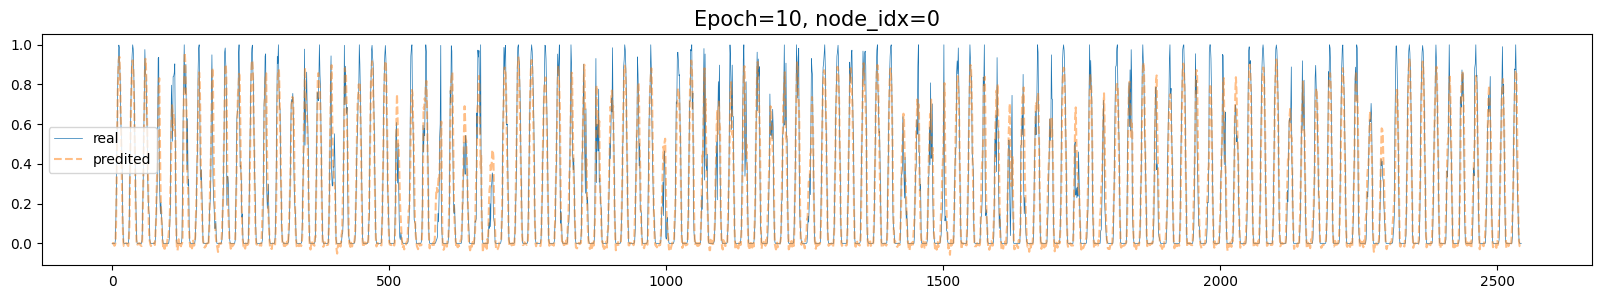

In [33]:
lrnr2.figs[-1]

In [46]:
classic = ((y - yhat)[LEN_TR:,:]**2).mean()
proposed = ((y - yUhat*yPhat)[LEN_TR:,:]**2).mean()
print('classic(mse)', round(classic,4))
print('proposed(mse)', round(proposed,4))

classic(mse) 0.0659
proposed(mse) 0.0576

In [16]:
%run test_model/gconvgru

In [17]:
s4 = Simulator()

In [ ]:
s4.simulate(
    n_iteration = 10,
    lags = [4, 8, 12, 24],
    filters = [4, 8, 12, 16, 32],
    epoch = [10],
    Model = GConv_GRU,
)

batch=6  t=80    loss=1.6561155319213867                

In [20]:
import os
fnames = ['./test/'+l for l in os.listdir('./test') if l[0] != '.']
fnames 

In [21]:
import os

def NumIter(model_name, fnames):
    count = 0  # 'gconvlstm'이 포함된 파일 개수를 저장할 변수
    # 디렉토리 내의 모든 파일 검사
    for file_path in fnames:
        file_name = os.path.basename(file_path)
        if model_name in file_name:
            count += 1

    print(f"{model_name}이 포함된 파일 개수: {count}")

In [22]:
NumIter('gconvgru', fnames)
NumIter('dcrnn', fnames)
NumIter('gconvlstm', fnames)
NumIter('lrgcn', fnames)
NumIter('gclstm', fnames)

gconvgru이 포함된 파일 개수: 50
dcrnn이 포함된 파일 개수: 50
gconvlstm이 포함된 파일 개수: 50
lrgcn이 포함된 파일 개수: 50
gclstm이 포함된 파일 개수: 50

In [23]:
df = pd.concat([pd.read_csv(fname) for fname in fnames]).reset_index(drop=True)

In [24]:
def summary_table(df):
    model_name = input("모델명을 입력하세요: ")
    df = df[df['model']== model_name]
    df_summary = df.groupby(by=['model','method','lags','nof_filters']).agg({'mse':[np.mean]}).reset_index()
    df_classic = df_summary[df_summary['method']=='classic']
    df_proposed = df_summary[df_summary['method']=='proposed'].reset_index()[['method','mse']]
    df_compare = pd.concat([df_classic, df_proposed], axis=1)
    return df_compare

In [25]:
summary_table(df)

In [31]:
summary_table(df)

In [32]:
summary_table(df)

In [33]:
summary_table(df)

In [34]:
summary_table(df)